NAME: Deedahwar Mazhar 
CMS ID: 243516




# ML using PyTorch

PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab. It is free and open-source software released under the Modified BSD license

## PyTorch Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see Bridge with NumPy). Tensors are also optimized for automatic differentiation (we’ll see more about that later in the Autograd section). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!

Go through the following link to learn the basics of Tensors in Pytorch:
https://pytorch.org/tutorials/beginner/basics/tensor_tutorial.html

## Linear Regression Using Pytorch

In [ ]:
from numpy import loadtxt
import numpy as np
import torch
from torch import nn
from torchvision import transforms
import torch.optim as optim


# Load the datasets
np_data = loadtxt('ex1data1.txt', delimiter=',')
# convert np array to pytorch tensor
X = torch.from_numpy((np_data[:,np.newaxis,0]).astype('float32'))
Y = torch.from_numpy(np_data[:,np.newaxis,1].astype('float32'))
print(X.shape)
# Linear regression hypothesis using Pytorch
hypothesis = nn.Linear(X.shape[1], 1, bias=True) # h = w x + b

optimizer = optim.SGD(hypothesis.parameters(), lr = .01) # stochastic gradient descent with learning rate lr
Cost = nn.MSELoss() # mean squared error

J_history = []
for iterations in range(200):
    optimizer.zero_grad()
    # forward pass
    out = hypothesis(X)
    
    loss = Cost(out, Y)
    
    # backward pass
    loss.backward()
    
    # update paramters
    optimizer.step()
    
    J_history += [loss.item()]
    


torch.Size([97, 1])


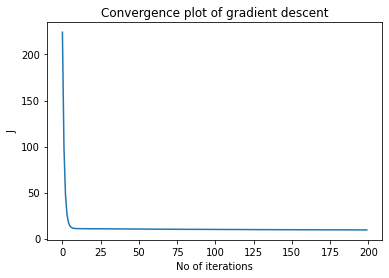

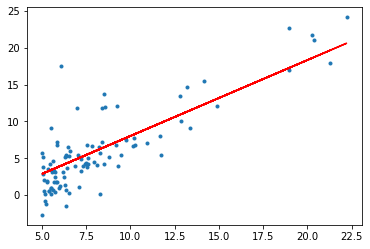

In [ ]:
# plot the results
from matplotlib import pyplot as plt
plt.plot(J_history)
plt.title('Convergence plot of gradient descent')
plt.xlabel('No of iterations')
plt.ylabel('J')
plt.show()
plt.plot(X,Y,'.')
plt.plot(X[:, 0], out.detach().numpy(), c = 'r')

## Multiclass Logistic Regression using Pytorch (softmax classification)

Reading assignment: Go through the following

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html
https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html

Mini batch gradient descent:

https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder

# Load the classification dataset (https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
np_data = datasets.load_iris()

# convert np array to pytorch tensor
X = torch.from_numpy((np_data.data).astype('float32'))
Y = torch.from_numpy((np_data.target.astype('int64')))


# Logistic regression hypothesis using Pytorch
hypothesis = nn.Sequential(
    nn.Linear(X.shape[1], 3, bias=True), 
    nn.LogSoftmax(dim=1)) 
    
optimizer = optim.SGD(hypothesis.parameters(), lr = .01) # stochastic gradient descent with learning rate lr
Cost = nn.NLLLoss() # Negative log likelihood loss

J_history = []
for iterations in range(200):
    optimizer.zero_grad()
    # forward pass
    out = hypothesis(X)
    
    loss = Cost(out, Y)
    
    # backward pass
    loss.backward()
    
    # update paramters
    optimizer.step()
    
    J_history += [loss.item()]
    


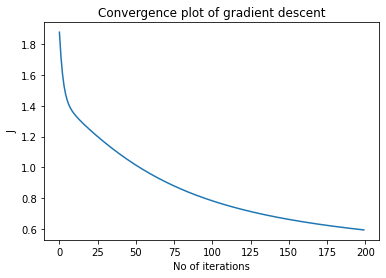

In [ ]:
# plot the results
from matplotlib import pyplot as plt
plt.plot(J_history)
plt.title('Convergence plot of gradient descent')
plt.xlabel('No of iterations')
plt.ylabel('J')
plt.show()

# Lab Task
## Logistic Regression on MNIST Handwritten Digit 
Apply logistic regression to mnist handwritten digits. Use the code in the previous cell as the starter code. There are 10 classes so the number of out_feature in nn.Linear will be 10. Set the in_features according to the dimension of vectorised image. Plot the convergence plot of gradiet descent.

Note: Do not use convolution or Deep neural network. Use vectorised image as input. Use multiclass logistic regression model as studied in the class and implemented in the previous cell. 

### 1. Load the MNIST data
Follow the guidelines here to download and use MNIST data
https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [ ]:
# use the following imports to download MNIST using Pytorch 


from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision import transforms
from torchvision import datasets


In [ ]:
d='data/'

train_d = datasets.MNIST(root = d, transform = transforms.ToTensor(), train = True,download=True)
test_d = datasets.MNIST(root = d, transform = transforms.ToTensor(), train = False,download=True)

train_l = DataLoader(train_d, batch_size=128, shuffle = True)
test_l = DataLoader(test_d, shuffle = False)


### 2.  Create a multiclass logistic regression (softmax) model and train

In [ ]:



hypoth = nn.Sequential(nn.Linear(784, 10, bias=True), nn.LogSoftmax(dim=1)) 

optim = optim.SGD(hyp.parameters(), lr = .01)

Cost = nn.NLLLoss()
epochS = 60
i = 0
J_history = []
for s in range(epochS):
  print(s)
  
  for d in train_l: 
    i=i+1
    att, feature = d[0],d[1]
    att = att.flatten(start_dim=1,end_dim=3)

    optim.zero_grad()
   
    out = hypoth(att)
    
    loss = Cost(out, feature)
    
   
    loss.backward()
    
  
    optim.step()

  J_history += [loss.item()] 
    
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


### 3. Plot Convergence plot of gradient descent with respect to no of epochs

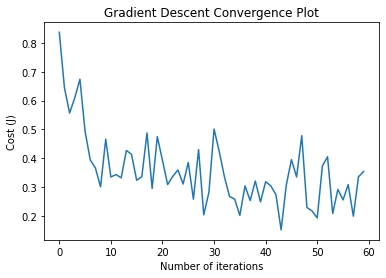

In [ ]:
plt.plot(J_history)
plt.title('Gradient descent convergence plot')
plt.ylabel('cost (J)')
plt.xlabel('Number of iterations')
plt.show()

### 4. Test on a batch of test images and display images with the predicted label

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import random

img = []
outcome = [] 

acc = 0
count = 0
for data in test_l:
    count+=1
    att, features = data[0],data[1]
    

    att = att.flatten(start_dim=1,end_dim=3)
    output = hypoth(att)
    yhat = torch.argmax(output)
    if yhat == features and len(img)<10:
        img.append(data[0])
        outcome.append(yhat)
    if yhat == features:
        acc = acc+ 1


accPer = (acc/count) *100
print(f'Model is of Accuracy: {accPer}%')
    



Model is of Accuracy: 91.93%


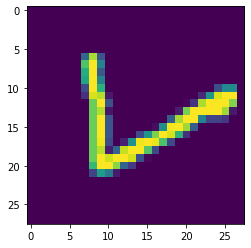

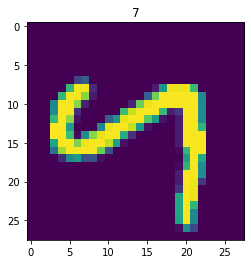

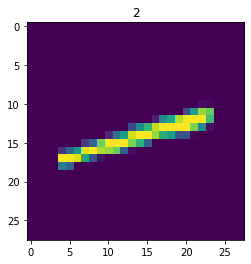

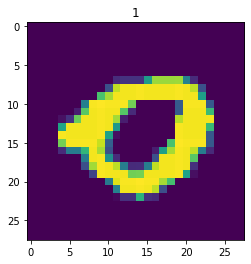

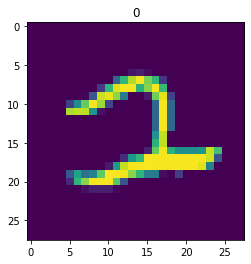

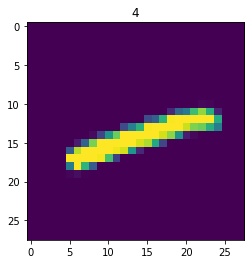

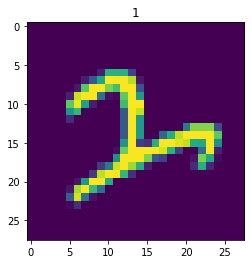

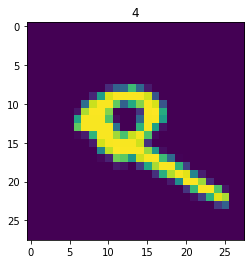

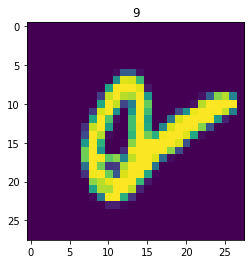

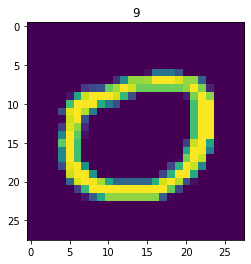

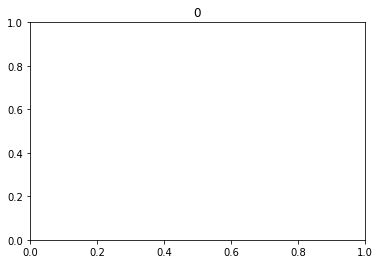

In [ ]:

for i in range(10):
  img  = img[i]
  img = img.flatten(start_dim=0,end_dim=2)
  img = torch.transpose(img,0,1)
  plt.imshow(img)
  plt.show()
  plt.title(outcome[i].item())
  
